In [3]:
# Read all results
import pandas as pd
import os
all_saved_data=pd.read_csv('Results_food_municipalities_months.csv')
all_saved_data=all_saved_data.append(pd.read_csv('Results_water_municipalities_months.csv'))
all_saved_data=all_saved_data.append(pd.read_csv('Results_energy_municipalities_months.csv'))
all_saved_data=all_saved_data.drop(columns=['Unnamed: 0'])
all_corr_df=pd.read_excel('All_correlations_food_municipalities_months.xlsx')
all_corr_df=all_corr_df.append(pd.read_excel('All_correlations_water_municipalities_months.xlsx'))
all_corr_df=all_corr_df.append(pd.read_excel('All_correlations_energy_municipalities_months.xlsx'))
all_corr_df=all_corr_df.drop(columns=['Unnamed: 0'])
impact_info=pd.read_excel('Variable List.xlsx','Impact')
hazard_info=pd.read_excel('Variable List.xlsx', 'Hazard')
# Get the current file directory (where the notebook is running)
current_dir = os.getcwd()
# Navigate to the root of the repository (adjust based on your directory structure)
repo_root = os.path.abspath(os.path.join(current_dir, '..'))  # Or adjust the number of ".." as needed
# Define the paths dynamically
impact_folder= os.path.join(repo_root, "Impact data")
anomalies=pd.read_csv(os.path.join(impact_folder, 'Merged_impacts_anomalies_nofilter.csv'))
anomalies=anomalies.drop(columns=['Unnamed: 0'])
all_saved_data_merged=all_saved_data.merge(all_corr_df, on=['Municipality',
 'Aggregation',
 'Trend',
 'Impact variable',
 'Hazard variable'])

C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\2025979969.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_saved_data=all_saved_data.append(pd.read_csv('Results_water_municipalities_months.csv'))
C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\2025979969.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_saved_data=all_saved_data.append(pd.read_csv('Results_energy_municipalities_months.csv'))
C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\2025979969.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_corr_df=all_corr_df.append(pd.read_excel('All_correlations_water_municipalities_months.xlsx'))
C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\2025979969

-1.351624671472484
4.2946159446247165
0.3930507884949023


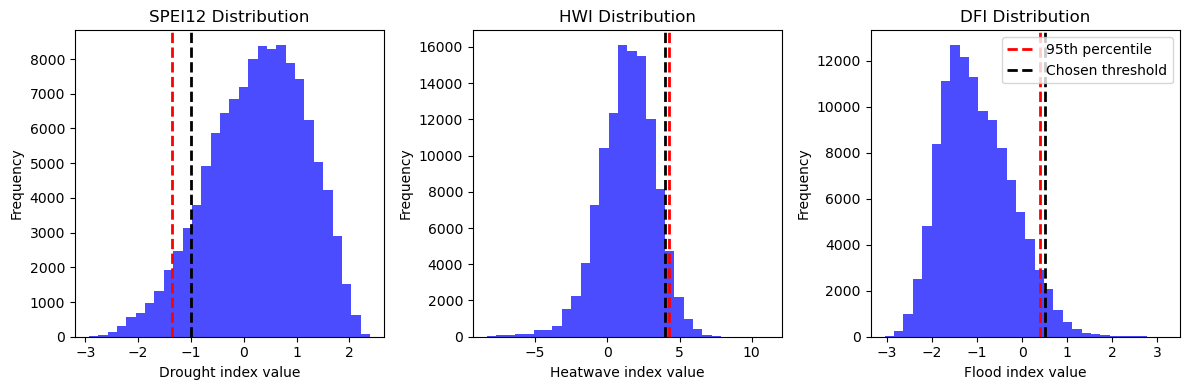

In [5]:
# For selecting thresholds, visualize distribution of hazard indices
import matplotlib.pyplot as plt

att_thresholds = {'SPEI12': -1, 'HWI': 4, 'DFI': 0.5}
att_hazards={'SPEI12':'Drought', 'HWI': 'Heatwave', 'DFI': 'Flood', 'Combined':'Combined'}
trend='Linear'
haz_vars=all_saved_data_merged['Hazard variable'].unique()
imp_vars=all_saved_data_merged['Impact variable'].unique()

# Number of hazard variables to visualize
n_haz_vars = len(haz_vars)

# Create subplots with 3 side-by-side histograms
fig, axes = plt.subplots(nrows=1, ncols=n_haz_vars, figsize=(12, 4))

# Iterate over hazard variables and plot each histogram
for i, haz_var in enumerate(haz_vars):
    att_df = all_saved_data_merged[all_saved_data_merged['Trend'] == trend]
    att_df = att_df[att_df['Hazard variable'] == haz_var]
    
    # Calculate mean and standard deviation
    mean_val = att_df['Hazard value'].mean()
    std_val = att_df['Hazard value'].std()
    
    # Plot histogram
    ax = axes[i]
    ax.hist(att_df['Hazard value'], bins=30, color='blue', alpha=0.7)
    
    # Plot vertical line 
    if haz_var=='SPEI12':
        #print(mean_val - 1*std_val)
        print(att_df['Hazard value'].quantile(0.05))
        ax.axvline(att_df['Hazard value'].quantile(0.05), color='red', linestyle='dashed', 
                   linewidth=2, label='5th percentile')
    else:
        #print(mean_val + 1*std_val)
        print(att_df['Hazard value'].quantile(0.95))
        ax.axvline(att_df['Hazard value'].quantile(0.95), color='red', linestyle='dashed', linewidth=2, label='95th percentile')
    ax.axvline(att_thresholds[haz_var], color='black', linestyle='dashed', linewidth=2, label='Chosen threshold')
    
    # Set title and labels
    ax.set_title(f'{haz_var} Distribution')
    ax.set_xlabel(str(att_hazards[haz_var])+' index value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1783377982.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_att_df= all_att_df.append(df)
C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1783377982.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_att_df= all_att_df.append(df)
C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1783377982.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_att_df= all_att_df.append(df)
C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1783377982.py:45: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comb_df=all_att_df.groupby(['Municipality', 'T

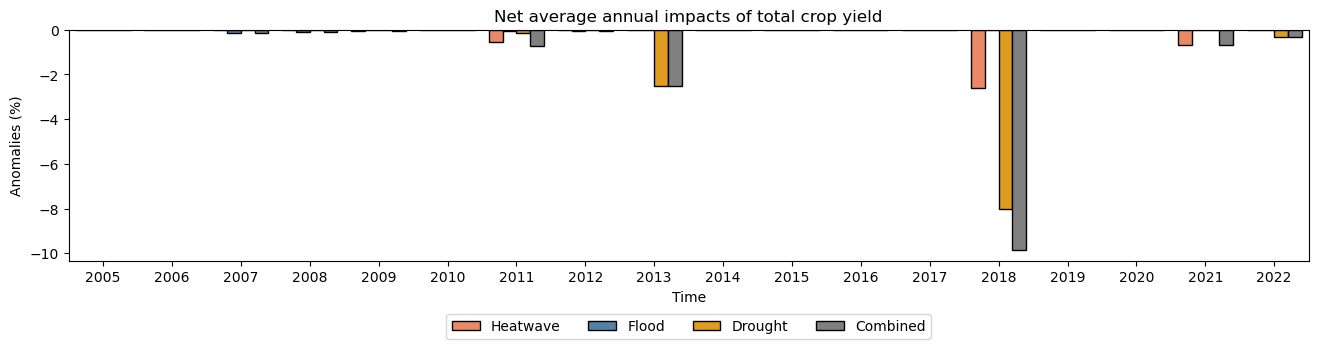

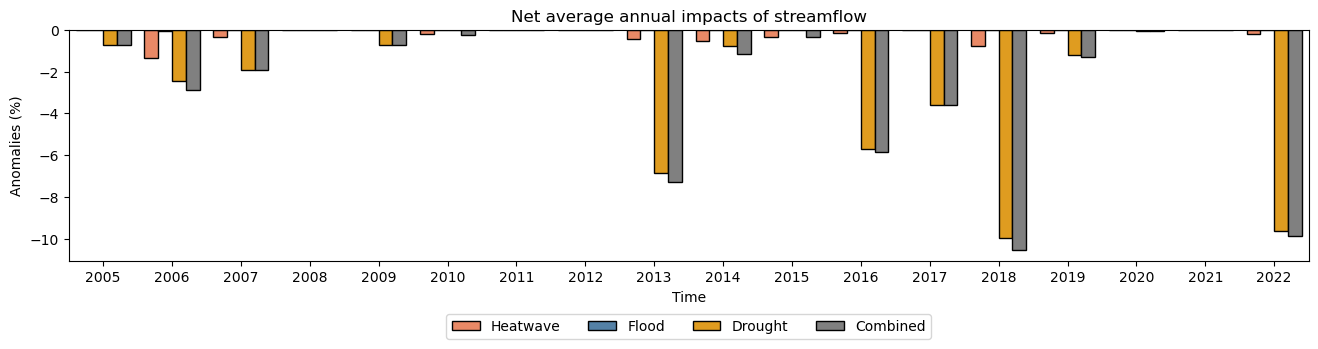

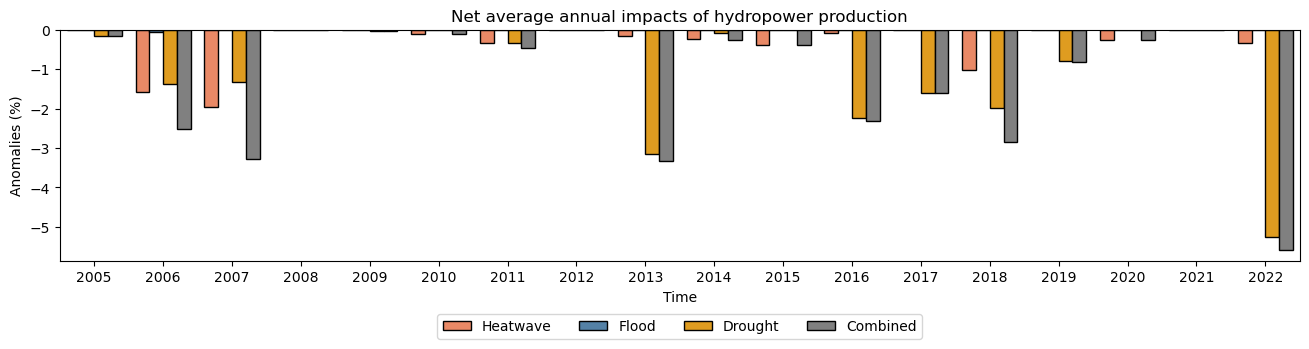

In [7]:
import seaborn
import numpy as np
# Attribution of negative anomalies to natural hazards (droughts, floods, heatwaves)
all_average_anomalies=pd.DataFrame()
all_saved_data_merged=all_saved_data.merge(all_corr_df, on=['Municipality',
 'Aggregation',
 'Trend',
 'Impact variable',
 'Hazard variable'])
att_thresholds={'SPEI12':-1, 'HWI': 4, 'DFI': 0.5} # extreme conditions
att_hazards={'SPEI12':'Drought', 'HWI': 'Heatwave', 'DFI': 'Flood', 'Combined':'Combined'}
trend='Linear'
haz_vars=all_saved_data['Hazard variable'].unique()
haz_vars = np.append(haz_vars, 'Combined')
imp_vars=all_saved_data['Impact variable'].unique()
for imp_var in imp_vars:
    all_att_df=pd.DataFrame()
    for haz_var in haz_vars:
        if haz_var!='Combined':
            att_df=all_saved_data_merged[all_saved_data_merged['Trend']==trend]
            att_df=att_df[att_df['Hazard variable']==haz_var]
            att_df=att_df[att_df['Impact variable']==imp_var]
            chosen_corr=all_corr_df[all_corr_df['Hazard variable']==haz_var]
            chosen_corr=chosen_corr[chosen_corr['Impact variable']==imp_var]
            chosen_corr=chosen_corr[chosen_corr['Trend']==trend]
            chosen_corr=chosen_corr.dropna(subset='A')
            max_corr_per_municipality = chosen_corr.groupby('Municipality').agg('max').reset_index()[['Municipality','Correlation']]
            # Extract the necessary columns: Municipality and Aggregation
            max_corr_per_municipality = max_corr_per_municipality.merge(chosen_corr).drop_duplicates('Municipality')
            # Merge with max correlations to get relevant municipalities and weights
            df = max_corr_per_municipality[['Municipality', 'Aggregation', 'Correlation','p','Hazard variable', 'Impact variable', 'Trend']].merge(att_df)
            # Filter by index value, anomalies not attributed receive zero
            if haz_var=='SPEI12':
                df.loc[df['Hazard value'] >= att_thresholds[haz_var], 'Observed anomalies'] = 0
            else:
                df.loc[df['Hazard value'] <= att_thresholds[haz_var], 'Observed anomalies'] = 0
            df.loc[df['Correlation'].isna(), 'Observed anomalies'] = 0
            # Attribute anomaly based on correlation
            df['Attributed impact']= df['Observed anomalies']
            df.loc[df['Attributed impact'] > 0, 'Attributed impact'] = 0 # Neglect positive impacts
            df['Hazard']=att_hazards[haz_var]
            df['Time']=df['Time'].astype(int)
            all_att_df= all_att_df.append(df)
        else:  # Combined case
            comb_df=all_att_df.groupby(['Municipality', 'Time'])['Attributed impact', 'Impact value'].min().reset_index()
            comb_df['Hazard']='Combined'
            # Append the combined impacts to all_att_df for plotting
            all_att_df = all_att_df.append(comb_df)

    # Compute weighted average of 'Observed anomalies' by 'Impact value'
    average_anomalies = all_att_df.groupby(['Time', 'Hazard'])['Attributed impact'].mean().reset_index()
    average_anomalies = average_anomalies.sort_values('Hazard', ascending=False)
    average_anomalies['Impact variable']=imp_var
    fig, ax = plt.subplots(figsize=(16,3))  
    seaborn.barplot(x="Time", 
            y="Attributed impact",  
            hue="Hazard",
            data=average_anomalies,
            ci=None,  # Removes the confidence interval around the mean
            palette=['coral', 'steelblue', 'orange', 'grey'],
            edgecolor='black') 
    plt.ylabel('Anomalies (%)')
    impvar_name=impact_info[impact_info['var']==imp_var]['Variable Name'].values[0]
    plt.title('Net average annual impacts of '+impvar_name.lower())
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
    all_average_anomalies= all_average_anomalies.append(average_anomalies)
    
    all_average_anomalies.to_excel('Annual_negative_impacts.xlsx')
    

C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for SPEI12 and crop_yield_total:
Hazard Bin
Extreme    -5.432160
Low         3.240352
Moderate    6.810485
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for SPEI12 and discharge:
Hazard Bin
Extreme    -25.926650
Low         10.757759
Moderate   -15.599452
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for SPEI12 and hydro_prod:
Hazard Bin
Extreme    -20.463958
Low          5.817164
Moderate    -6.681065
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for HWI and crop_yield_total:
Hazard Bin
Extreme    -0.785869
Low        -1.400698
Moderate    3.291509
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for HWI and discharge:
Hazard Bin
Extreme    -7.676568
Low        -3.894350
Moderate   -0.717887
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for HWI and hydro_prod:
Hazard Bin
Extreme    -2.069588
Low         0.249261
Moderate   -0.339120
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for DFI and crop_yield_total:
Hazard Bin
Extreme     3.291509
Low         3.450449
Moderate   -1.436545
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for DFI and discharge:
Hazard Bin
Extreme     25.784098
Low         -7.462829
Moderate    13.285178
Name: Observed anomalies, dtype: float64


C:\Users\MarlonVieiraPassos\AppData\Local\Temp\ipykernel_2892\1367926960.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Medians for DFI and hydro_prod:
Hazard Bin
Extreme     20.249808
Low         -1.996702
Moderate     9.878330
Name: Observed anomalies, dtype: float64


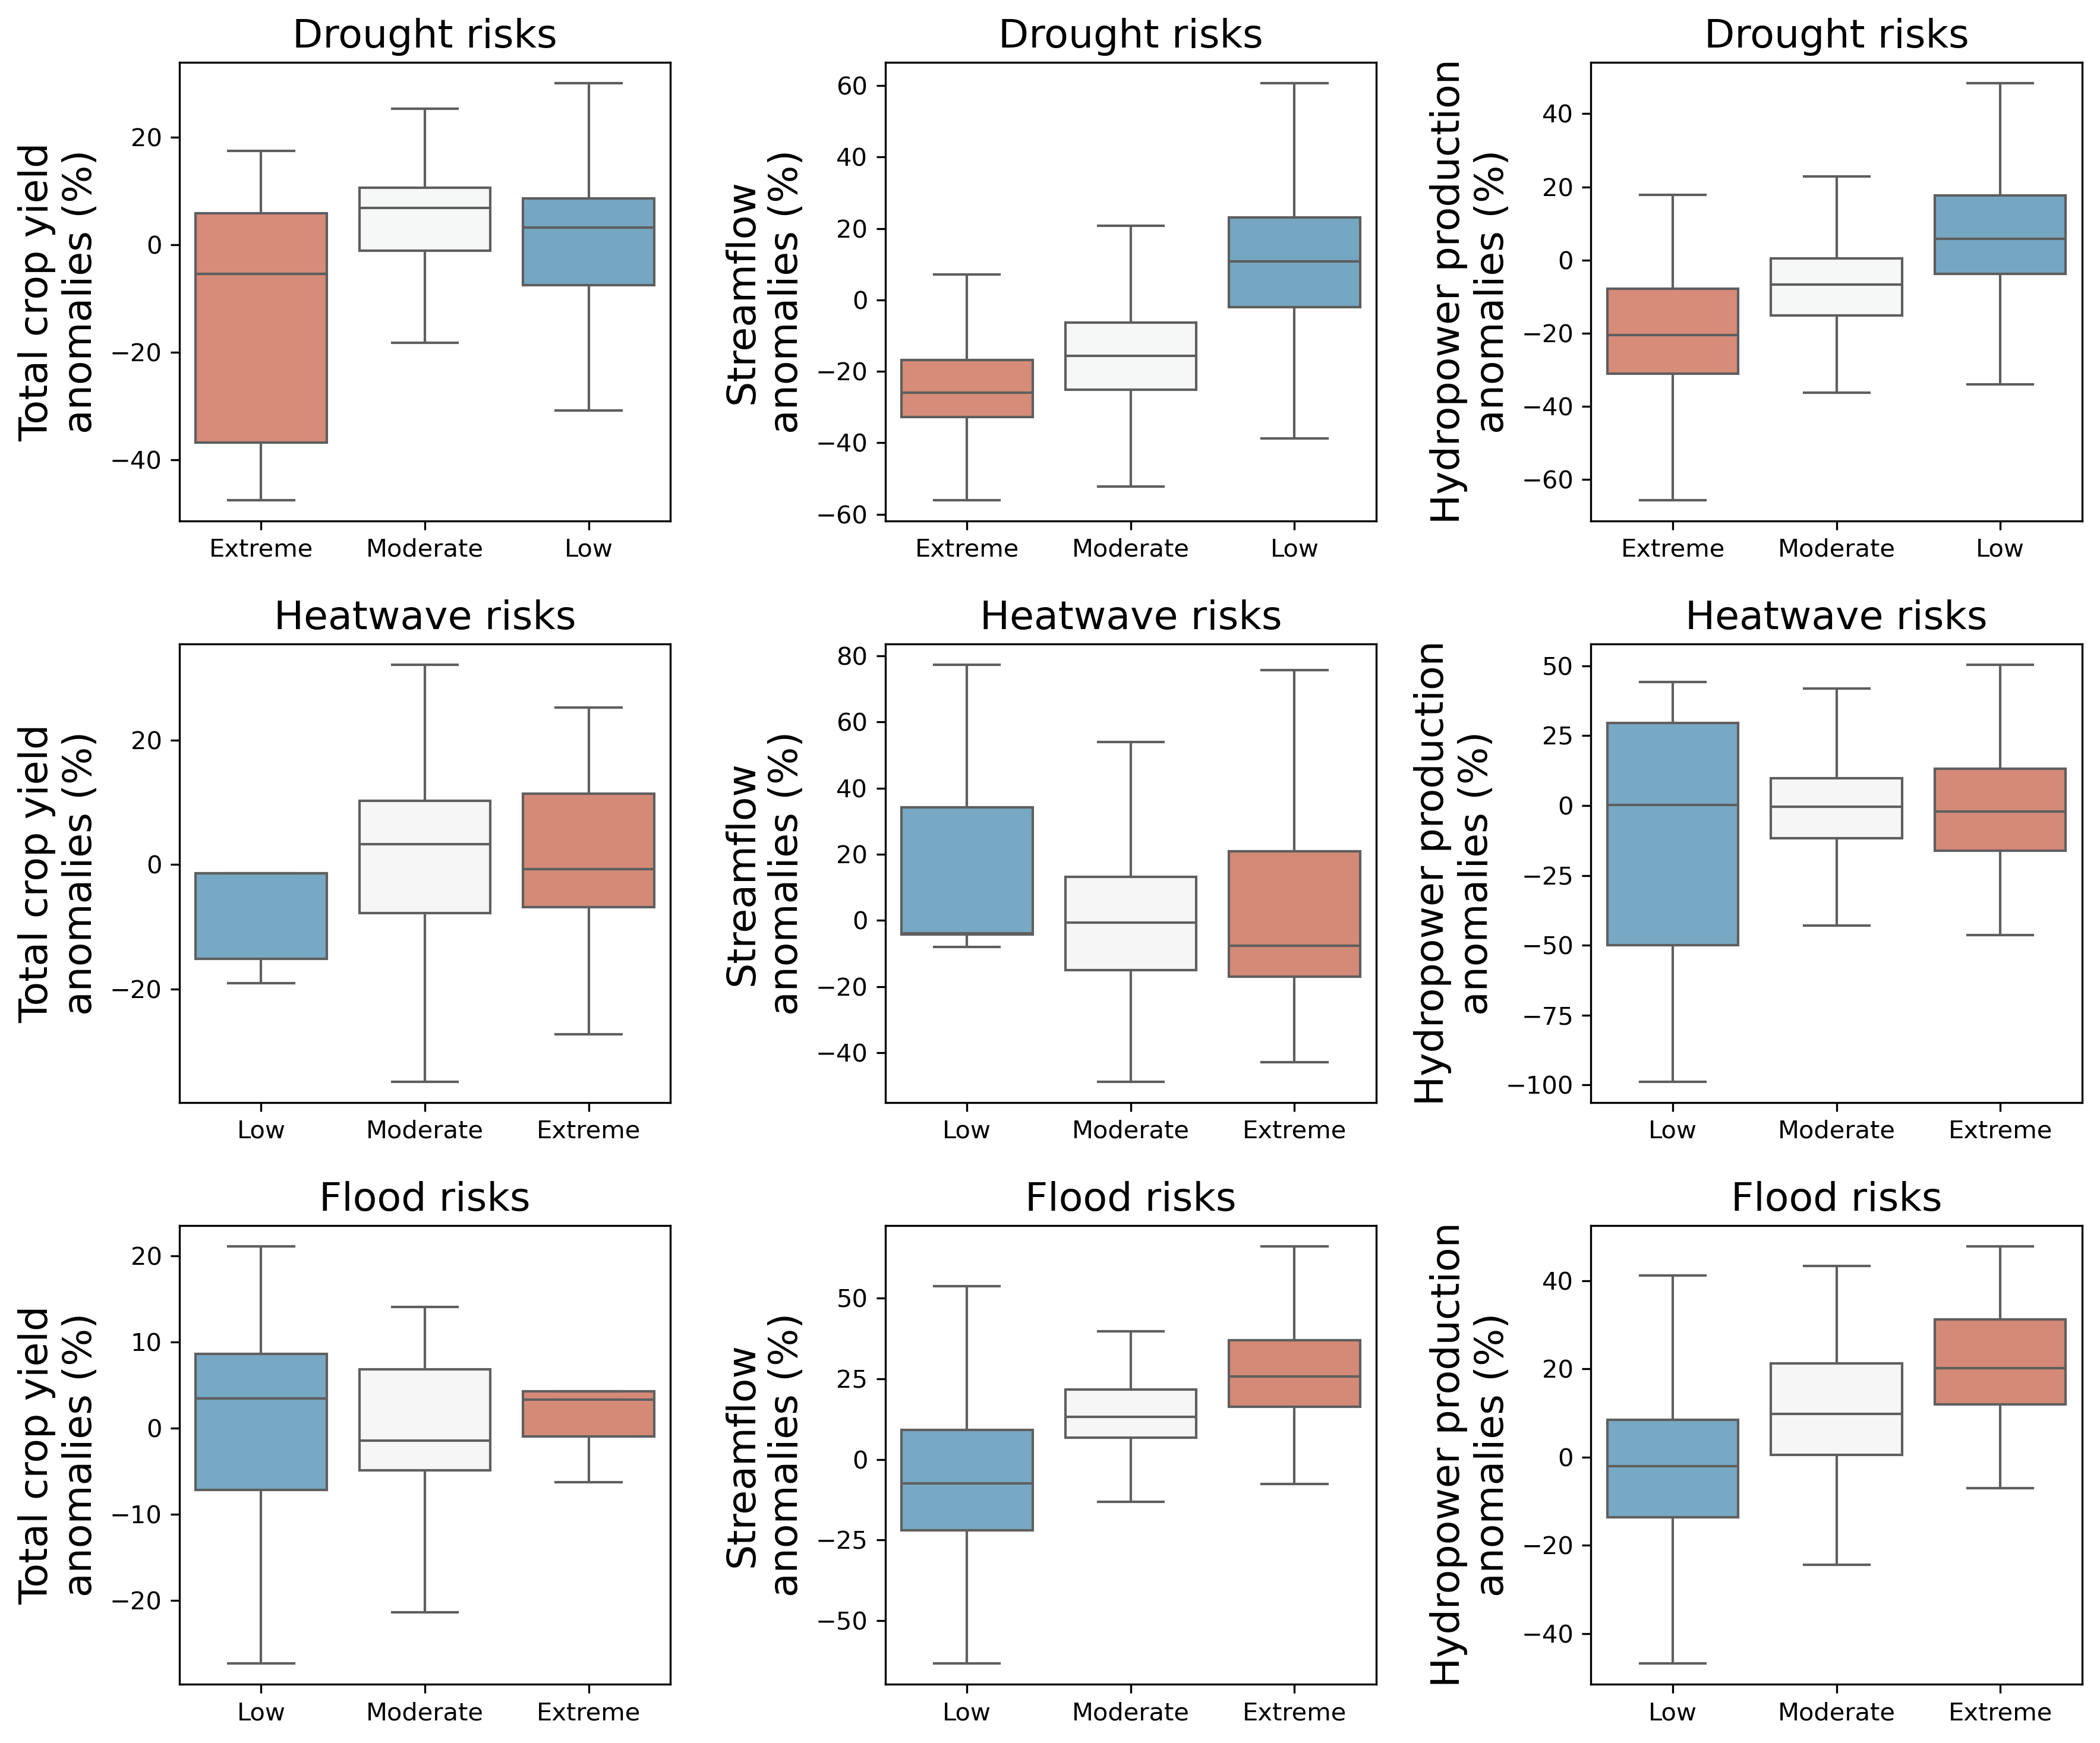

In [8]:
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(12, 10), dpi=300)#, gridspec_kw={'wspace': 0.4, 'hspace': 0.6})
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
# Set font properties for publication quality
SIZE_DEFAULT = 14
SIZE_LARGE = 16
SIZE_SMALL = 13
plt.rc("font", family="Arial")
plt.rc("font", size=SIZE_DEFAULT)
plt.rc("axes", titlesize=SIZE_LARGE)
plt.rc("axes", labelsize=SIZE_SMALL)
plt.rc("xtick", labelsize=SIZE_SMALL)
plt.rc("ytick", labelsize=SIZE_SMALL)

# Detrending method
trends = ['Linear']

# Counter for subplot index
plot_index = 0
impvars = all_saved_data_merged['Impact variable'].unique()
hazvars = all_saved_data_merged['Hazard variable'].unique()
impact_info=pd.read_excel('Variable List.xlsx',
                         'Impact')
hazard_info=pd.read_excel('Variable List.xlsx',
                         'Hazard')
hazard_labels={'SPEI12':'Drought', 'HWI': 'Heatwave', 'DFI': 'Flood'}
# Define bin descriptions for each climate index
bin_descriptions = {
    'SPEI12': {
        (-np.inf, -1.0): 'Extreme',
        (-1.0, 0): 'Moderate',
        (0, np.inf): 'Low',
    },
    'HWI': {
        (-np.inf, -4): 'Low',
        (-4, 4): 'Moderate',
        (4, np.inf): 'Extreme'
    },
    'DFI': {
        (-np.inf, 0): 'Low',
        (0, 0.5): 'Moderate',
        (0.5, np.inf): 'Extreme'
    }
}

for trend in trends:
    for hazvar in hazvars:
        for impvar in impvars:
            plot_data = all_saved_data_merged[all_saved_data_merged['Trend'] == trend]
            plot_data = plot_data[plot_data['Hazard variable'] == hazvar]
            plot_data = plot_data[plot_data['Impact variable'] == impvar]
            plot_data = plot_data.dropna(subset='Correlation') # Only show statistically significant areas
            ax = axes[plot_index]
            # Get correlation data
            chosen_corr = all_corr_df[all_corr_df['Hazard variable'] == hazvar]
            chosen_corr = chosen_corr[chosen_corr['Impact variable'] == impvar]
            chosen_corr = chosen_corr[chosen_corr['Trend'] == trend]
            chosen_corr = chosen_corr.dropna(subset='A')
            max_corr_per_municipality = chosen_corr.groupby('Municipality').agg('max').reset_index()[['Municipality', 'Correlation']]
            max_corr_per_municipality = max_corr_per_municipality.merge(chosen_corr).drop_duplicates('Municipality')
            max_corr_per_municipality['Aggregation'] = max_corr_per_municipality['Aggregation'].astype(int)
            plot_data=max_corr_per_municipality.merge(plot_data)
            # Use bin edges specific to each hazard variable
            bins = list(bin_descriptions[hazvar].keys())
            bin_edges = [edge[0] for edge in bins] + [bins[-1][1]]
            plot_data['Hazard Bin'] = pd.cut(plot_data['Hazard value'], bins=bin_edges)
            
            # Aggregate observed anomalies by bin
            aggregated_data = plot_data.groupby('Hazard Bin')['Observed anomalies'].mean().reset_index()
            aggregated_data['Bin Label'] = [bin_descriptions[hazvar][bin_range] for bin_range in bins]

            # Set bar width to 80% of bin width for separation
            bar_width = 0.8 * (bin_edges[1] - bin_edges[0])
            # Extract the unique intervals from 'Hazard Bin' (ensuring data exists in each bin)
            intervals = plot_data['Hazard Bin'].cat.categories
            # Prepare data for each bin, filtering by the exact interval from pd.cut
            data_for_bins = [plot_data[plot_data['Hazard Bin'] == interval]['Observed anomalies'].dropna() for interval in intervals]
            plot_data_df = pd.DataFrame({label: data for label, data in zip(bin_descriptions[hazvar].values(), data_for_bins)})
            # Transform DataFrame to long format for Seaborn
            plot_data_long = plot_data_df.melt(var_name="Hazard Bin", value_name="Observed anomalies")
            # Plot using Seaborn with color palette
            if hazvar=='SPEI12':
                palette="RdBu"
            else:
                palette="RdBu_r"
            sns.boxplot(
                data=plot_data_long,
                x="Hazard Bin",
                y="Observed anomalies",
                palette=palette,  # Adjust color palette here
                showfliers=False,
                ax=ax  # Use existing matplotlib axis for subplot control
            )
            # Labels and title
            impvar_name = impact_info[impact_info['var'] == impvar]['Variable Name'].values[0]
            hazvar_name = hazard_info[hazard_info['var'] == hazvar]['Variable Name'].values[0]
            ax.set_xlabel('')
            ax.set_ylabel(impvar_name+'\nanomalies (%)', fontsize=16)
            ax.set_title(hazard_labels[hazvar]+' risks')
            # Remove gridlines
            ax.grid(False)
            ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
            # Move to the next subplot
            plot_index += 1
            
            # Calculate and print medians
            medians = plot_data_long.groupby('Hazard Bin')['Observed anomalies'].median()
            print(f"Medians for {hazvar} and {impvar}:")
            print(medians)
# Adjust layout and save figure
plt.tight_layout()
plt.savefig('fig_obs.svg', dpi=300, bbox_inches='tight')
plt.show()

Average crop_yield_total anomaly prediction at SPEI12 = -1.5: -9.8%
Average crop_yield_total anomaly prediction at HWI = 3: 7.5%
Average crop_yield_total anomaly prediction at DFI = 1: -2.0%
Average discharge anomaly prediction at SPEI12 = -1.5: -28.2%
Average discharge anomaly prediction at HWI = 3: 7.0%
Average discharge anomaly prediction at DFI = 1: 19.3%
Average hydro_prod anomaly prediction at SPEI12 = -1.5: -25.8%
Average hydro_prod anomaly prediction at HWI = 3: 1.6%
Average hydro_prod anomaly prediction at DFI = 1: 14.2%


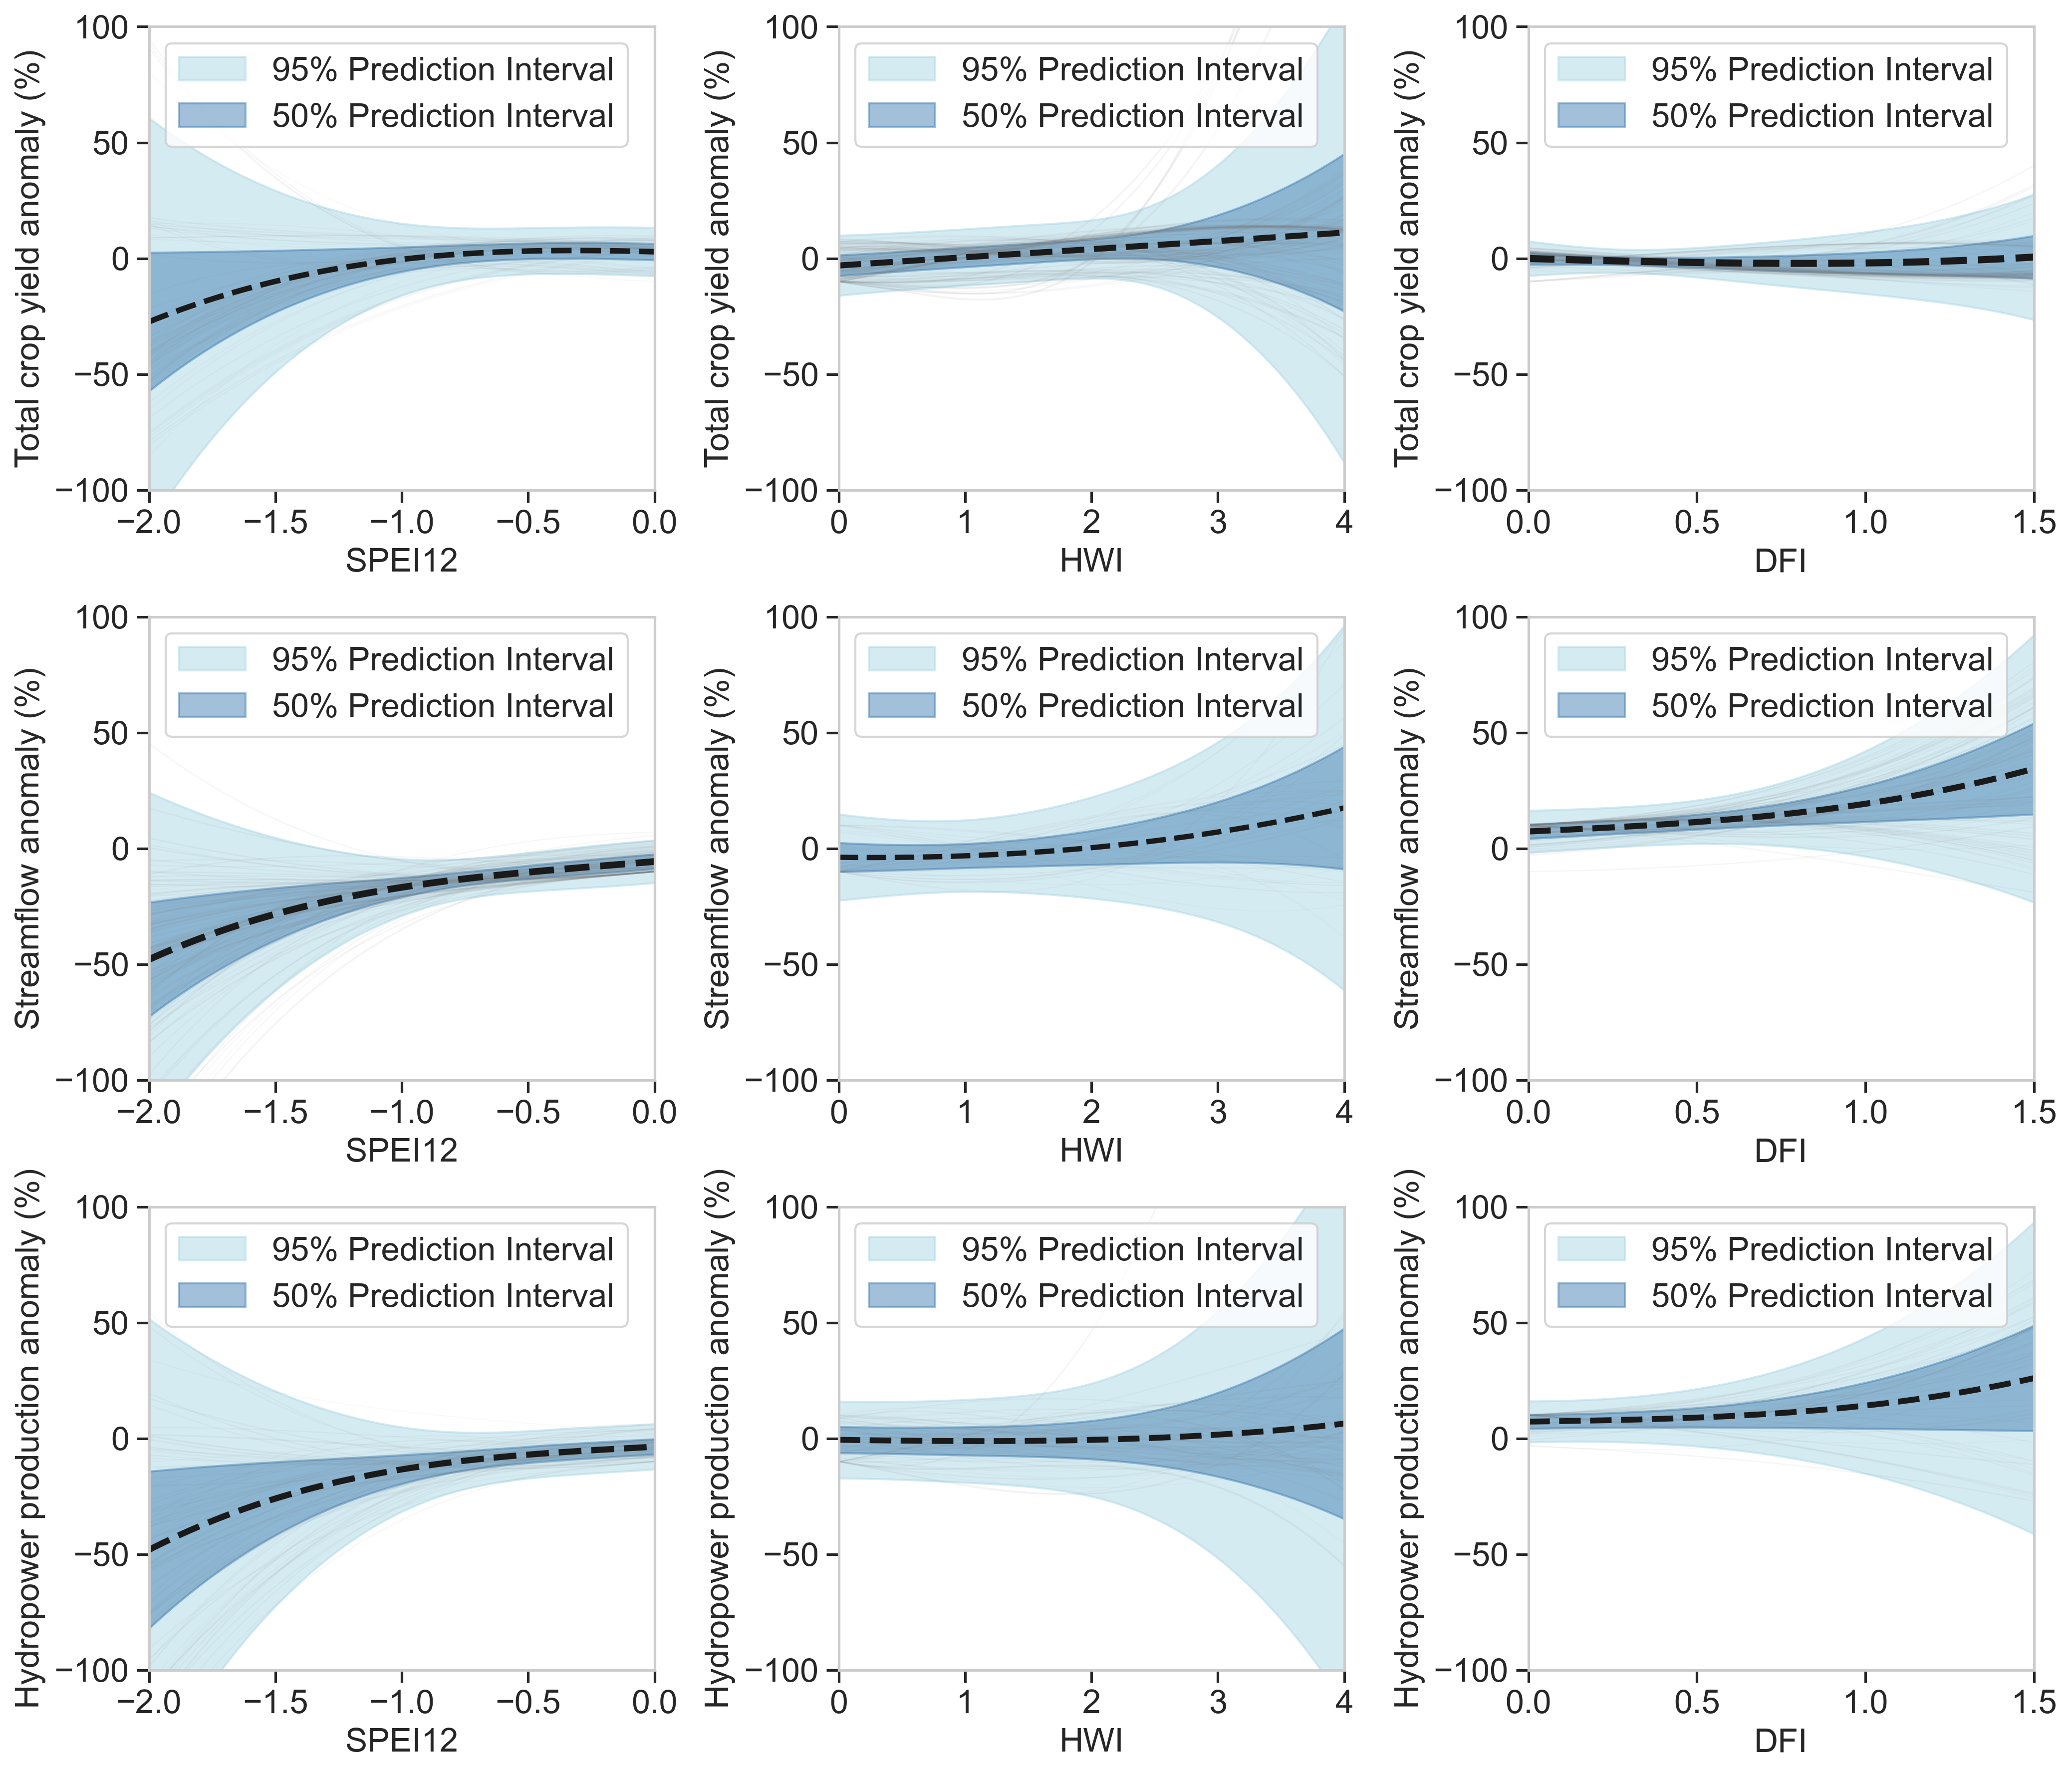

In [9]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.dates as mdates
from scipy import stats  # Import for statistical calculations

min_corr = 0
max_corr = 1.0

# Font and style settings for publication-quality visuals
SIZE_DEFAULT = 16
SIZE_LARGE = 18
plt.rc("font", family="Arial")  # Use Arial font
plt.rc("font", size=SIZE_DEFAULT)
plt.rc("axes", titlesize=SIZE_LARGE)
plt.rc("axes", labelsize=SIZE_LARGE)
plt.rc("xtick", labelsize=SIZE_DEFAULT)
plt.rc("ytick", labelsize=SIZE_DEFAULT)
plt.rc("legend", fontsize=SIZE_DEFAULT)

# Setting limits for x and y axes based on hazard variables
check_thresholds = {'SPEI12': -1.5, 'HWI': 3, 'DFI': 1}
min_xlimits = {'SPEI12': -2, 'HWI': 0, 'DFI': 0}
max_xlimits = {'SPEI12': 0, 'HWI': 4, 'DFI': 1.5}
min_ylimits = {'SPEI12': -100, 'HWI': -100, 'DFI': -100}
max_ylimits = {'SPEI12': 100, 'HWI': 100, 'DFI': 100}

# Style the background of the plot
sns.set(style="whitegrid")
all_saved_data = all_saved_data[all_saved_data['Time'] < 2023]
anomalies = anomalies[anomalies['Time'] < 2023]

# Define trend and impact/hazard variables
chosen_trend = 'Linear'
impact_vars = all_saved_data['Impact variable'].dropna().unique()
hazard_vars = all_saved_data['Hazard variable'].dropna().unique()
impact_vars = impact_vars[impact_vars != 'groundwater']
impact_vars = impact_vars[impact_vars != 'livestock']

# Create a figure and axes for subplots (4 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(14, 12), dpi=300)  # High DPI for quality

# Loop over impact and hazard variables
for i, impact_var in enumerate(impact_vars):
    df_anom = anomalies[anomalies['Variable'] == impact_var]
    df_anom = df_anom[df_anom['Trend'] == chosen_trend]
    df_anom['Type'] = 'Observed'
    df_plot = df_anom.copy()
    
    for N in range(len(hazard_vars)):
        ax = axes[i, N]
        chosen_var = hazard_vars[N]
        chosen_data = all_saved_data[all_saved_data['Hazard variable'] == chosen_var]
        chosen_data = chosen_data[chosen_data['Impact variable'] == impact_var]
        chosen_data = chosen_data[chosen_data['Trend'] == chosen_trend]
        chosen_data = chosen_data.sort_values('Time', ascending=True)

        # Get correlation data
        chosen_corr = all_corr_df[all_corr_df['Hazard variable'] == chosen_var]
        chosen_corr = chosen_corr[chosen_corr['Impact variable'] == impact_var]
        chosen_corr = chosen_corr[chosen_corr['Trend'] == chosen_trend]
        chosen_corr = chosen_corr.dropna(subset='A')

        max_corr_per_municipality = chosen_corr.groupby('Municipality').agg('max').reset_index()[['Municipality', 'Correlation']]
        max_corr_per_municipality = max_corr_per_municipality.merge(chosen_corr).drop_duplicates('Municipality')
        max_corr_per_municipality['Aggregation'] = max_corr_per_municipality['Aggregation'].astype(int)

        x = np.linspace(min_xlimits[chosen_var], max_xlimits[chosen_var], 100)
        muns = max_corr_per_municipality.Municipality.unique()
        
        impact_data=max_corr_per_municipality.merge(chosen_data)
        impact_data=impact_data.sort_values('Time')
        impact_data=impact_data.dropna(subset='Correlation') # only for statistically significant municipalities

        # Initialize lists to store model predictions
        #avg_predictions = np.zeros_like(x)
        predictions_list = []
        correlations = []  # Store R-squared values for average calculation

        # Calculate predictions for each municipality
        for mun in muns:
            mun_params = max_corr_per_municipality[max_corr_per_municipality['Municipality'] == mun]
            a = mun_params.A.iloc[0]
            b = mun_params.B.iloc[0]
            c = mun_params.C.iloc[0]
            d = mun_params.D.iloc[0]
            corr = mun_params.Correlation.iloc[0]
            if corr >= min_corr and a + b + c + d != 0:  # Do not show municipalities without data
                model = a * x**3 + b * x**2 + c * x + d  # 3rd-degree polynomial
                predictions_list.append(model)
                correlations.append(corr)  # Collect R-squared values
                ax.plot(x, model, alpha=corr / 10, linewidth= corr, color='gray')
        
        
        # Calculate the mean of predictions
        predictions_array = np.array(predictions_list)
        avg_predictions = np.mean(predictions_array, axis=0)
        avg_corr = np.mean(correlations)  # Average R-squared value
        
        # Print average predictions at threshold values
        target= check_thresholds[chosen_var]
        index_nearest = np.abs(x - target).argmin()
        print(f'Average {impact_var} anomaly prediction at {chosen_var} = {np.round(target, 1)}: {np.round(avg_predictions[index_nearest], 1)}%')

        # Calculate standard error of the mean prediction
        n = predictions_array.shape[0]  # Number of predictions
        SE = np.std(predictions_array, axis=0, ddof=1) / np.sqrt(n)  # Standard error of the mean prediction
        residuals = predictions_array - avg_predictions  # Calculate residuals
        s = np.std(residuals, axis=0, ddof=1)  # Standard deviation of residuals

        # Calculate prediction interval
        t_value = stats.t.ppf(0.975, n-1)  # 95% prediction interval
        SE_pred = SE + s * np.sqrt(1 + 1/n)  # Standard error of prediction
        ci_lower_pred = avg_predictions - t_value * SE_pred  # Lower bound
        ci_upper_pred = avg_predictions + t_value * SE_pred  # Upper bound
        t_value_50 = stats.t.ppf(0.75, n-1) # 50% prediction interval
        ci_lower_pred_50 = avg_predictions - t_value_50 * SE_pred  # Lower bound
        ci_upper_pred_50 = avg_predictions + t_value_50 * SE_pred  # Upper bound

        # Plot the average model
        ax.plot(x, avg_predictions, linestyle='--', color='k', linewidth=5*avg_corr)

        # Add shaded area for prediction intervals
        ax.fill_between(x, ci_lower_pred, ci_upper_pred, color='lightblue', alpha=0.5, label='95% Prediction Interval')
        ax.fill_between(x, ci_lower_pred_50, ci_upper_pred_50, color='steelblue', alpha=0.5, label='50% Prediction Interval')
        # Scatter plot of observed anomalies
        y_obs=impact_data['Observed anomalies'].values
        x_obs=impact_data['Hazard value'].values
        corr_obs=impact_data['Correlation'].values
        y_obs[y_obs==0]=np.nan
        #ax.scatter(x_obs, y_obs, color='gray', alpha=0.04*corr_obs)
        
        # Set axis labels and limits
        impvar_name = impact_info[impact_info['var'] == impact_var]['Variable Name'].values[0]
        ax.set_ylabel(f'{impvar_name} anomaly (%)', size=SIZE_DEFAULT)
        hazvar_name = hazard_info[hazard_info['var'] == chosen_var]['Variable Name'].values[0]
        ax.set_xlabel(hazvar_name, size=SIZE_DEFAULT)
        ax.tick_params(axis='x', labelsize=SIZE_DEFAULT)
        ax.tick_params(axis='y', labelsize=SIZE_DEFAULT)
        ax.grid(False)
        ax.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
        ax.set_ylim([min_ylimits[chosen_var], max_ylimits[chosen_var]])
        ax.set_xlim([min_xlimits[chosen_var], max_xlimits[chosen_var]])
        ax.legend(loc='upper left', fontsize=SIZE_DEFAULT)

# Adjust layout
plt.tight_layout()

# Save and display the figure
plt.savefig('fig_anoms.svg', dpi=300, bbox_inches='tight')
plt.show()
